In [2]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata,make_circles
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [14]:
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
data=df.copy()
data.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [15]:
data.replace({ np.nan:0}, inplace=True)
df.isnull().any().any()

data.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [16]:
le = LabelEncoder() 
data['Anio']= le.fit_transform(data['Anio'])
data.head()


,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,0,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,0,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,0,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,0,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,0,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [17]:
col=data.columns#toma las  columnas
features=col.tolist() 
feature=features[:-1] 
target=features[-1]#quita Resultados
X=data.loc[:,feature].values  
y=data.loc[:,target].values
#estandarizado
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X,columns=feature).head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado
0,0.0,-2.545207,-2.24042,-0.824552,-1.356990,-0.068324,-0.568863,0.349267,-0.044655,-0.051879
1,0.0,-2.545207,-2.24042,-0.824552,-0.905294,10.905898,-0.553314,-0.510837,19.243434,55.024476
2,0.0,-2.545207,-2.24042,-0.824552,-0.905294,13.885042,-0.549103,-0.923511,17.084677,-0.051879
3,0.0,-2.545207,-2.24042,-0.824552,-0.905294,0.202644,-0.568863,-0.902951,0.241172,-0.051879
4,0.0,-2.545207,-2.24042,-0.824552,-0.679446,0.893125,1.633012,1.657782,4.381478,-0.016695


In [18]:
#Definiendo componentes 
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,2.487899,-2.390221
1,31.235465,27.884395
2,16.351889,11.889882
3,2.789126,-2.123032
4,4.909305,0.137738


In [19]:
finalDf=pd.concat([principalDf,data[['Nomproducto']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,Nomproducto
0,2.487899,-2.390221,Miel
1,31.235465,27.884395,Carne
2,16.351889,11.889882,Ganado en pie
3,2.789126,-2.123032,Huevo-plato
4,4.909305,0.137738,Carne


In [20]:
data.Nomproducto.unique()

array(['Miel', 'Carne', 'Ganado en pie', 'Huevo-plato', 'Leche', 'Cera',
       'Lana'], dtype=object)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
print('X_train shape',X_train.shape)  
print('X_test shape',X_test.shape)   
print('y_train shape',y_train.shape)  
print('y_test shape',y_test.shape)

X_train shape (26691, 10)
X_test shape (6673, 10)
y_train shape (26691,)
y_test shape (6673,)


In [22]:
X_train_original=X_train.copy()

In [23]:

#fit only on Training data  
sc.fit(X_train)   
#Apply the transformation to both test & train data   
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)

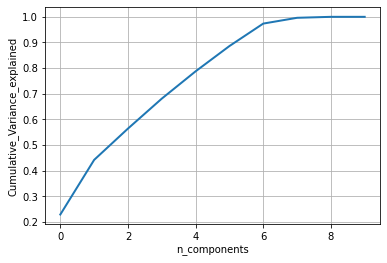

In [27]:
pca=PCA()  
pca.n_components=10
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [28]:
pca=PCA()  
pca.n_components=10
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=22.880000
if n_components= 1,   variance=44.190000
if n_components= 2,   variance=56.410000
if n_components= 3,   variance=68.090000
if n_components= 4,   variance=78.740000
if n_components= 5,   variance=88.600000
if n_components= 6,   variance=97.360000
if n_components= 7,   variance=99.620000
if n_components= 8,   variance=100.000000
if n_components= 9,   variance=100.000000


In [29]:
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 7


In [30]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (26691, 2)


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


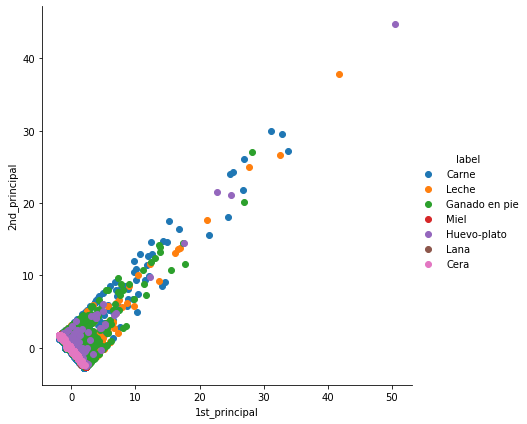

In [31]:
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [32]:
pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.7887007343024127
F1 score: 0.8015668543373726
Recall: 0.7887007343024127
Precision: 0.8413700680222599

 clasification report:
                precision    recall  f1-score   support

        Carne       0.86      0.77      0.81      2492
         Cera       0.84      0.80      0.82       231
Ganado en pie       0.87      0.70      0.78      2570
  Huevo-plato       0.38      1.00      0.55       444
         Lana       0.93      0.98      0.95       105
        Leche       0.99      0.99      0.99       536
         Miel       0.85      0.88      0.87       295

     accuracy                           0.79      6673
    macro avg       0.82      0.88      0.82      6673
 weighted avg       0.84      0.79      0.80      6673


 confussion matrix:
 [[1929    0  267  292    3    1    0]
 [   0  184    0    0    0    0   47]
 [ 315    0 1810  433    5    7    0]
 [   0    0    1  443    0    0    0]
 [   2    0    0    0  103    0    0]
 [   0    0    3    0    0  533    0]
 [